# 🐄 Análisis integral de la producción Bovina en Argentina

---

## 📊 Dasboard de Rentabilidad Ganadera

### 🎯 Objetivos del Análisis 

- **Identificar** las provincias más rentables para la producción bobina
- **Análizar** factores clave que impactan la rentabilidad
- **Desarrollar** modelos predictivos para optimizar ingresos
- **Detectar** tendencias temporales y oportunidades de mejora

### 📈 Métricas clave a evaluar
| Métrica | Descripción | Unidad |
|---------|-------------|--------|
| 💰 **Ingreso Neto**  | Ganancia por hectárea | $/ha |
| 📊 **Eficiencia de Stock** | Productividad del ganado | % |
| 🎯 **Destete** | Tasa de supervivencia | % |
| ⚖️ **Carga Animal** | Densidad ganadera | kg/ha |
| 💸 **Costos totales** | Gastos directos + indirectos | $/ha |

---


## 🔧 Configuración del Entorno

Importamos las librerías necesarias para el análisis completo:

In [21]:
# ========================================
# 📚 LIBRERÍAS PARA ANÁLISIS DE DATOS
# ========================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import warnings
from datetime import datetime

# Configuración visual mejorada
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configuración de matplotlib para mejor calidad
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

print("🎨 Configuración visual completada")
print("📦 Todas las librerías cargadas exitosamente")
print("=" * 50)

🎨 Configuración visual completada
📦 Todas las librerías cargadas exitosamente


## 📂 Carga y exploración inicial de Datos

In [22]:
print("🔄 Cargando datos de producción bovina...")

df=pd.read_csv('produccion-de-carne-bovina.csv', encoding='latin-1')

print(f"✅ Datos cargados exitosamente")
print(f"📊 El conjunto de datos contiene: {df.shape[0]} filas y {df.shape[1]} columnas.")
print(f"📅 Período de análisis:", df['año'].min(), "a", df['año'].max())
print(f"🌎 Provincias incluidas: {df['provincia'].nunique()}")
print(f"🏛️ Departamentos incluidos:", df['departamento'].nunique())
print("=" * 60)


🔄 Cargando datos de producción bovina...
✅ Datos cargados exitosamente
📊 El conjunto de datos contiene: 2598 filas y 24 columnas.
📅 Período de análisis: 2015 a 2018
🌎 Provincias incluidas: 13
🏛️ Departamentos incluidos: 199


In [23]:
# ========================================
# 🔍 INFORMACIÓN DETALLADA DEL DATASET
# ========================================

print("📋 RESUMEN DEL DATASET")
print("=" * 50)
print(f"📊 Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
print(f"💾 Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("=" * 50)

# Información detallada de tipos de datos
print("\n📊 TIPOS DE DATOS Y VALORES NO NULOS")
print("-" * 50)
df_info = pd.DataFrame({
    'Columna': df.columns,
    'Tipo de Dato': df.dtypes,
    'Valores No Nulos': df.count(),
    'Valores Nulos': df.isnull().sum(),
    '% Completo': ((df.count() / len(df)) * 100).round(2)
})

# Mostrar la tabla formateada
for i, row in df_info.iterrows():
    completeness_bar = "█" * int(row['% Completo'] / 5) + "░" * (20 - int(row['% Completo'] / 5))
    print(f"{row['Columna']:<25} | {str(row['Tipo de Dato']):<12} | {row['Valores No Nulos']:>6} | {row['Valores Nulos']:>6} | {row['% Completo']:>6}% | {completeness_bar}")

print("=" * 50)

📋 RESUMEN DEL DATASET
📊 Dimensiones: 2,598 filas × 24 columnas
💾 Memoria utilizada: 1.36 MB

📊 TIPOS DE DATOS Y VALORES NO NULOS
--------------------------------------------------
pais_id                   | int64        |   2598 |      0 |  100.0% | ████████████████████
pais                      | object       |   2598 |      0 |  100.0% | ████████████████████
provincia_id              | int64        |   2598 |      0 |  100.0% | ████████████████████
provincia                 | object       |   2598 |      0 |  100.0% | ████████████████████
departamento_id           | int64        |   2598 |      0 |  100.0% | ████████████████████
departamento              | object       |   2598 |      0 |  100.0% | ████████████████████
prov_depto                | int64        |   2598 |      0 |  100.0% | ████████████████████
año                       | int64        |   2598 |      0 |  100.0% | ████████████████████
mes                       | int64        |   2598 |      0 |  100.0% | █████████████

In [24]:
# ========================================
# 👀 VISTA PREVIA DE LOS DATOS
# ========================================

print("🔍 PRIMERAS 5 FILAS DEL DATASET")
print("=" * 80)

# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 20)

# Mostrar las primeras filas con mejor formato
display(df.head().style.set_properties(**{
    'background-color': '#f0f0f0',
    'color': 'black',
    'border-color': 'white'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
]))

print(f"\n📝 Mostrando las primeras 5 filas de {len(df):,} registros totales")

🔍 PRIMERAS 5 FILAS DEL DATASET


,pais_id,pais,provincia_id,provincia,departamento_id,departamento,prov_depto,año,mes,modelo,actividad,referencia,margen_bruto_($/ha),resultado_neto_($/ha),ingreso_neto_($/ha),gastos_directos_($/ha),costos_indirectos_($/ha),eficiencia_stock_(%),producción_(kg/ha),destete_(%),carga_(kg/ha),Unnamed: 21,Unnamed: 22,Unnamed: 23
0,32,Argentina,6,Buenos Aires,105,Bolivar,6105,2018,2,buenos aires centro-sudoeste,ciclo completo,http://www.agroindustria.gob.ar/sitio/areas/bovinos/modelos/,1766,-31,3497,1730,1797,35,117,69,336,nan,nan,nan
1,32,Argentina,6,Buenos Aires,231,Daireaux,6231,2018,2,buenos aires centro-sudoeste,ciclo completo,http://www.agroindustria.gob.ar/sitio/areas/bovinos/modelos/,1766,-31,3497,1730,1797,35,117,69,336,nan,nan,nan
2,32,Argentina,6,Buenos Aires,203,Coronel Suarez,6203,2018,2,buenos aires centro-sudoeste,ciclo completo,http://www.agroindustria.gob.ar/sitio/areas/bovinos/modelos/,1766,-31,3497,1730,1797,35,117,69,336,nan,nan,nan
3,32,Argentina,14,Cordoba,42,General San Martin,14042,2018,2,centro cordoba sur,ciclo completo,http://www.agroindustria.gob.ar/sitio/areas/bovinos/modelos/,2045,136,4589,2544,1909,36,157,65,436,nan,nan,nan
4,32,Argentina,14,Cordoba,56,Juarez Celman,14056,2018,2,centro cordoba sur,ciclo completo,http://www.agroindustria.gob.ar/sitio/areas/bovinos/modelos/,2045,136,4589,2544,1909,36,157,65,436,nan,nan,nan



📝 Mostrando las primeras 5 filas de 2,598 registros totales


🔍 ANÁLISIS DETALLADO DE VALORES NULOS
📊 RESUMEN GENERAL:
   • Total de valores nulos: 7,753
   • Porcentaje total de nulos: 12.43%
   • Columnas con valores nulos: 3/24
------------------------------------------------------------
🚨 COLUMNAS CON VALORES FALTANTES:
------------------------------------------------------------
   Unnamed: 21               |     2598 | 100.00% | ██████████████████████████████████████████████████
   Unnamed: 22               |     2598 | 100.00% | ██████████████████████████████████████████████████
   Unnamed: 23               |     2557 |  98.42% | █████████████████████████████████████████████████░


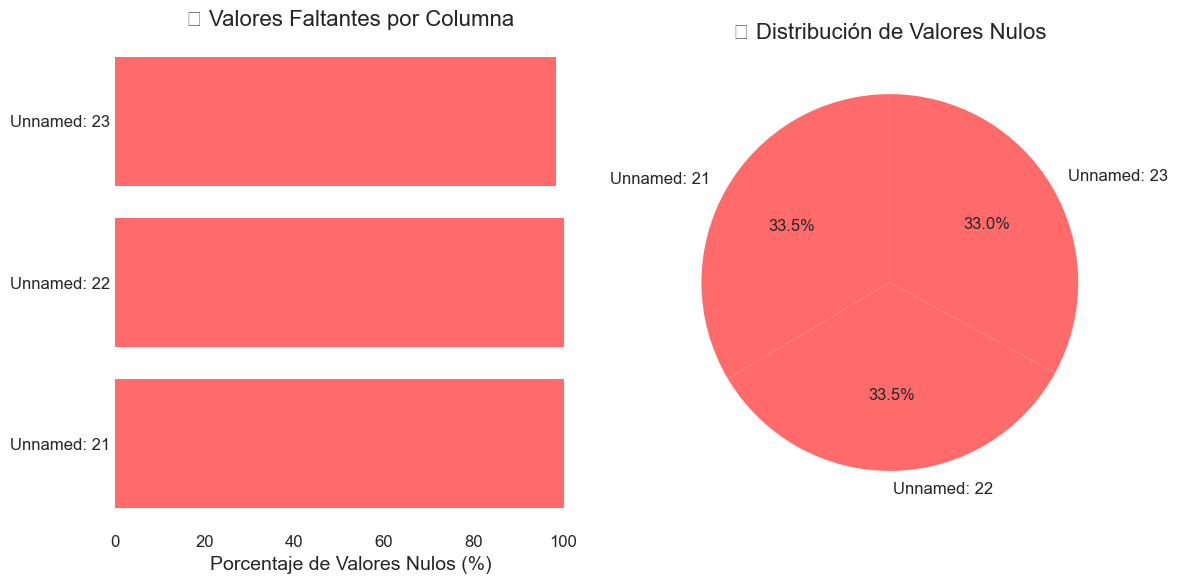

In [25]:
# ========================================
# 🚨 ANÁLISIS DE VALORES FALTANTES
# ========================================

print("🔍 ANÁLISIS DETALLADO DE VALORES NULOS")
print("=" * 60)

# Calcular estadísticas de valores nulos
null_counts = df.isnull().sum()
null_percentage = (null_counts / len(df)) * 100
total_nulls = null_counts.sum()

# Crear resumen general
print(f"📊 RESUMEN GENERAL:")
print(f"   • Total de valores nulos: {total_nulls:,}")
print(f"   • Porcentaje total de nulos: {(total_nulls / (len(df) * len(df.columns))) * 100:.2f}%")
print(f"   • Columnas con valores nulos: {(null_counts > 0).sum()}/{len(df.columns)}")
print("-" * 60)

# Mostrar solo columnas con valores nulos
if total_nulls > 0:
    print("🚨 COLUMNAS CON VALORES FALTANTES:")
    print("-" * 60)
    
    missing_data = pd.DataFrame({
        'Columna': null_counts.index,
        'Valores Nulos': null_counts.values,
        'Porcentaje': null_percentage.values
    })
    
    # Filtrar solo columnas con valores nulos
    missing_data = missing_data[missing_data['Valores Nulos'] > 0].sort_values('Valores Nulos', ascending=False)
    
    if not missing_data.empty:
        for _, row in missing_data.iterrows():
            bar_length = int(row['Porcentaje'] / 2)  # Escala para barras de 50 caracteres max
            progress_bar = "█" * bar_length + "░" * (50 - bar_length)
            print(f"   {row['Columna']:<25} | {row['Valores Nulos']:>8} | {row['Porcentaje']:>6.2f}% | {progress_bar}")
    
    # Visualización con matplotlib
    if not missing_data.empty:
        plt.figure(figsize=(12, 6))
        colors = ['#FF6B6B' if x > 50 else '#FFA500' if x > 20 else '#4ECDC4' for x in missing_data['Porcentaje']]
        
        plt.subplot(1, 2, 1)
        plt.barh(missing_data['Columna'], missing_data['Porcentaje'], color=colors)
        plt.xlabel('Porcentaje de Valores Nulos (%)')
        plt.title('🚨 Valores Faltantes por Columna')
        plt.grid(axis='x', alpha=0.3)
        
        plt.subplot(1, 2, 2)
        plt.pie(missing_data['Valores Nulos'], labels=missing_data['Columna'], autopct='%1.1f%%', 
                colors=colors, startangle=90)
        plt.title('📊 Distribución de Valores Nulos')
        
        plt.tight_layout()
        plt.show()
else:
    print("✅ ¡EXCELENTE! No se encontraron valores nulos en el dataset")
    print("   El dataset está completo y listo para el análisis")

print("=" * 60)

In [26]:
# ========================================
# 🧹 LIMPIEZA Y PREPROCESAMIENTO DE DATOS
# ========================================

print("🔧 PROCESO DE LIMPIEZA DE DATOS")
print("=" * 50)

# Identificar columnas problemáticas antes de la limpieza
columnas_originales = df.columns.tolist()
print(f"📊 Columnas originales: {len(columnas_originales)}")

# Identificar columnas con nombres problemáticos (Unnamed)
columnas_unnamed = [col for col in df.columns if 'Unnamed' in str(col)]
print(f"🚨 Columnas 'Unnamed' encontradas: {len(columnas_unnamed)}")

if columnas_unnamed:
    print("   Columnas a eliminar:")
    for col in columnas_unnamed:
        null_count = df[col].isnull().sum()
        null_percentage = (null_count / len(df)) * 100
        print(f"   • {col}: {null_count:,} nulos ({null_percentage:.1f}%)")
    
    # Eliminar columnas problemáticas
    df_cleaned = df.drop(columns=columnas_unnamed)
    print(f"\n✅ Columnas eliminadas exitosamente")
else:
    df_cleaned = df.copy()
    print("✅ No se encontraron columnas problemáticas para eliminar")

print(f"📊 Columnas después de limpieza: {len(df_cleaned.columns)}")
print(f"📉 Reducción de columnas: {len(columnas_originales) - len(df_cleaned.columns)}")

# Verificar el estado después de la limpieza
print("\n🔍 VERIFICACIÓN POST-LIMPIEZA:")
print("-" * 30)
remaining_nulls = df_cleaned.isnull().sum().sum()
print(f"💧 Valores nulos restantes: {remaining_nulls:,}")

if remaining_nulls == 0:
    print("🎉 ¡PERFECTO! Dataset completamente limpio")
else:
    print("⚠️  Aún quedan algunos valores nulos para revisar")

# Asignar el dataframe limpio para uso posterior
df1 = df_cleaned.copy()
print(f"\n✅ Dataset limpio guardado como 'df1' con {df1.shape[0]:,} filas y {df1.shape[1]} columnas")
print("=" * 50)

🔧 PROCESO DE LIMPIEZA DE DATOS
📊 Columnas originales: 24
🚨 Columnas 'Unnamed' encontradas: 3
   Columnas a eliminar:
   • Unnamed: 21: 2,598 nulos (100.0%)
   • Unnamed: 22: 2,598 nulos (100.0%)
   • Unnamed: 23: 2,557 nulos (98.4%)

✅ Columnas eliminadas exitosamente
📊 Columnas después de limpieza: 21
📉 Reducción de columnas: 3

🔍 VERIFICACIÓN POST-LIMPIEZA:
------------------------------
💧 Valores nulos restantes: 0
🎉 ¡PERFECTO! Dataset completamente limpio

✅ Dataset limpio guardado como 'df1' con 2,598 filas y 21 columnas


In [27]:
# ========================================
# ✨ DATASET LIMPIO - VISTA PREVIA
# ========================================

print("🎯 DATASET DESPUÉS DE LA LIMPIEZA")
print("=" * 60)

# Mostrar estadísticas del dataset limpio
print(f"📊 Dimensiones finales: {df1.shape[0]:,} filas × {df1.shape[1]} columnas")
print(f"🧮 Tipos de datos únicos: {df1.dtypes.value_counts().to_dict()}")
print(f"💾 Memoria utilizada: {df1.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("-" * 60)

# Vista previa mejorada del dataset limpio
print("🔍 PRIMERAS 5 FILAS DEL DATASET LIMPIO:")

# Aplicar estilo mejorado
styled_df = df1.head().style.set_properties(**{
    'background-color': '#f8f9fa',
    'color': '#2c3e50',
    'border': '1px solid #dee2e6',
    'text-align': 'center',
    'font-size': '12px'
}).set_table_styles([
    {'selector': 'thead th', 'props': [
        ('background-color', '#28a745'),
        ('color', 'white'),
        ('font-weight', 'bold'),
        ('text-align', 'center'),
        ('border', '1px solid white')
    ]},
    {'selector': 'tbody tr:nth-child(even)', 'props': [
        ('background-color', '#f2f2f2')
    ]},
    {'selector': 'tbody tr:hover', 'props': [
        ('background-color', '#e8f5e8')
    ]}
])

display(styled_df)

print(f"\n📝 Vista previa completa del dataset limpio y procesado")
print("🚀 ¡Listo para análisis avanzados!")

🎯 DATASET DESPUÉS DE LA LIMPIEZA
📊 Dimensiones finales: 2,598 filas × 21 columnas
🧮 Tipos de datos únicos: {dtype('int64'): 15, dtype('O'): 6}
💾 Memoria utilizada: 1.30 MB
------------------------------------------------------------
🔍 PRIMERAS 5 FILAS DEL DATASET LIMPIO:


,pais_id,pais,provincia_id,provincia,departamento_id,departamento,prov_depto,año,mes,modelo,actividad,referencia,margen_bruto_($/ha),resultado_neto_($/ha),ingreso_neto_($/ha),gastos_directos_($/ha),costos_indirectos_($/ha),eficiencia_stock_(%),producción_(kg/ha),destete_(%),carga_(kg/ha)
0,32,Argentina,6,Buenos Aires,105,Bolivar,6105,2018,2,buenos aires centro-sudoeste,ciclo completo,http://www.agroindustria.gob.ar/sitio/areas/bovinos/modelos/,1766,-31,3497,1730,1797,35,117,69,336
1,32,Argentina,6,Buenos Aires,231,Daireaux,6231,2018,2,buenos aires centro-sudoeste,ciclo completo,http://www.agroindustria.gob.ar/sitio/areas/bovinos/modelos/,1766,-31,3497,1730,1797,35,117,69,336
2,32,Argentina,6,Buenos Aires,203,Coronel Suarez,6203,2018,2,buenos aires centro-sudoeste,ciclo completo,http://www.agroindustria.gob.ar/sitio/areas/bovinos/modelos/,1766,-31,3497,1730,1797,35,117,69,336
3,32,Argentina,14,Cordoba,42,General San Martin,14042,2018,2,centro cordoba sur,ciclo completo,http://www.agroindustria.gob.ar/sitio/areas/bovinos/modelos/,2045,136,4589,2544,1909,36,157,65,436
4,32,Argentina,14,Cordoba,56,Juarez Celman,14056,2018,2,centro cordoba sur,ciclo completo,http://www.agroindustria.gob.ar/sitio/areas/bovinos/modelos/,2045,136,4589,2544,1909,36,157,65,436



📝 Vista previa completa del dataset limpio y procesado
🚀 ¡Listo para análisis avanzados!


## 💰 Análisis de rentabilidad por provincia

### Dasboard de ingresos y costos

#### Exploramos la distribución de ingresos, gastos y rentablidad a nivel provincial:

Procesando datos...
Creando visualización corregida...


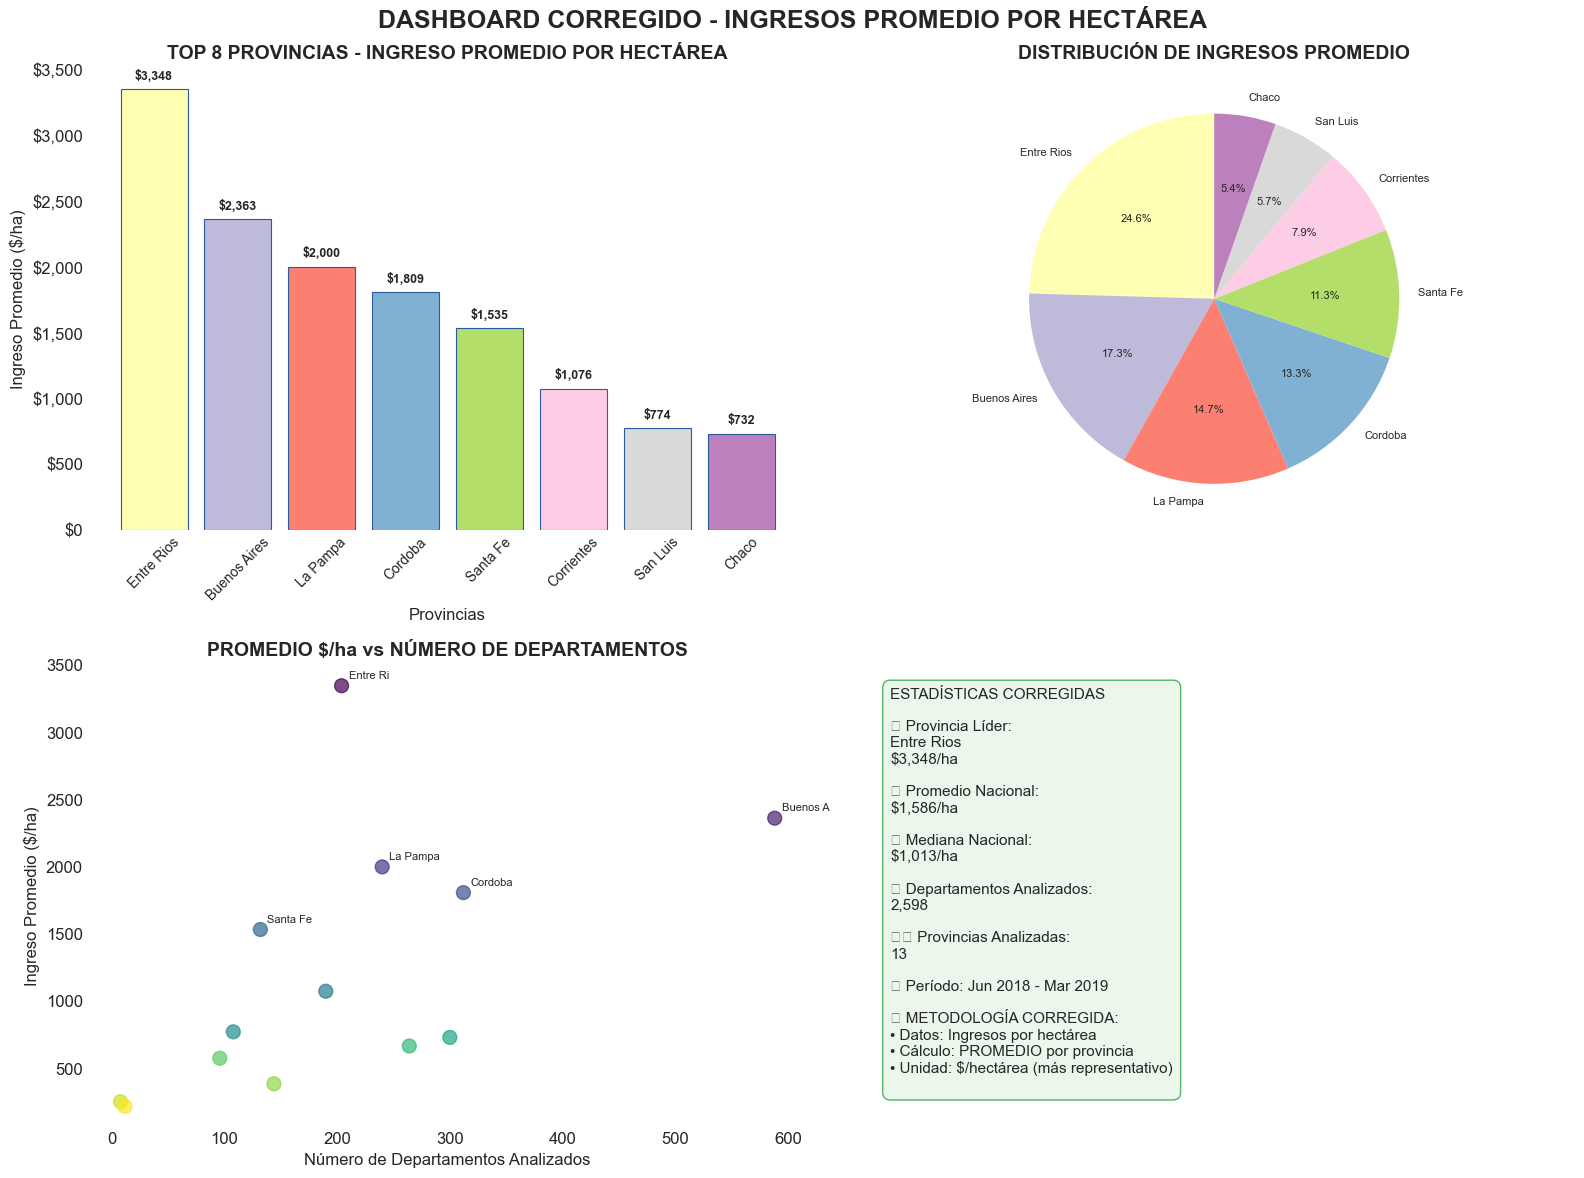

✅ Dashboard corregido completado

           RESUMEN EJECUTIVO CORREGIDO - INGRESOS PROMEDIO            
🏆 Provincia más rentable: Entre Rios
💰 Ingreso promedio líder: $3,348/ha
📊 Promedio nacional: $1,586/ha
📈 Mediana nacional: $1,013/ha
🗺️ Provincias analizadas: 13
🌾 Departamentos analizados: 2,598

🔝 TOP 5 PROVINCIAS (Ingreso Promedio por Hectárea):
   1. Entre Rios: $3,348/ha (204 depts)
   2. Buenos Aires: $2,363/ha (588 depts)
   3. La Pampa: $2,000/ha (240 depts)
   4. Cordoba: $1,809/ha (312 depts)
   5. Santa Fe: $1,535/ha (132 depts)

💡 INTERPRETACIÓN CORRECTA:
   • Los valores ahora representan INGRESOS PROMEDIO por hectárea
   • Cada provincia se evalúa por su rentabilidad promedio
   • Se considera el número de departamentos para evaluar representatividad
   • Rangos: $205 - $5980 por hectárea


In [28]:
# DASHBOARD CORREGIDO - INGRESOS PROMEDIO POR HECTÁREA POR PROVINCIA

print("Procesando datos...")

# CORRECCIÓN: Calcular PROMEDIOS en lugar de sumas
avg_ganancias = df.groupby('provincia')['ingreso_neto_($/ha)'].mean().reset_index()
avg_ganancias = avg_ganancias.sort_values('ingreso_neto_($/ha)', ascending=False)
avg_ganancias.columns = ['provincia', 'promedio_por_ha']

# También calcular otras estadísticas útiles por provincia
stats_provincia = df.groupby('provincia').agg({
    'ingreso_neto_($/ha)': ['mean', 'median', 'std', 'count'],
    'gastos_directos_($/ha)': 'mean',
    'costos_indirectos_($/ha)': 'mean'
}).round(2)

# Aplanar los nombres de columnas
stats_provincia.columns = ['_'.join(col).strip() for col in stats_provincia.columns]
stats_provincia = stats_provincia.reset_index()

# Función para formatear números
def format_currency(value):
    if value >= 1_000:
        return f"${value:,.0f}"
    else:
        return f"${value:.0f}"

print("Creando visualización corregida...")

# Configuración de la figura
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('DASHBOARD CORREGIDO - INGRESOS PROMEDIO POR HECTÁREA', fontsize=18, fontweight='bold')

# Gráfico de barras principal - PROMEDIOS (TOP 8)
colors_vibrant = plt.cm.Set3(np.linspace(0.1, 0.8, 8))
top8_avg = avg_ganancias.head(8)
bars = ax1.bar(top8_avg['provincia'], top8_avg['promedio_por_ha'], 
               color=colors_vibrant, edgecolor='#2c5aa0', linewidth=0.8)

ax1.set_title('TOP 8 PROVINCIAS - INGRESO PROMEDIO POR HECTÁREA', fontsize=14, fontweight='bold')
ax1.set_xlabel('Provincias', fontsize=12)
ax1.set_ylabel('Ingreso Promedio ($/ha)', fontsize=12)
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.grid(axis='y', alpha=0.3)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format_currency(x)))

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 50,
             format_currency(height), ha='center', va='bottom', fontweight='bold', fontsize=9)

# Gráfico circular - distribución de promedios
pie_data = top8_avg['promedio_por_ha']
pie_labels = top8_avg['provincia']
pie_colors = colors_vibrant[:len(pie_data)]

ax2.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', 
        colors=pie_colors, startangle=90, textprops={'fontsize': 8})
ax2.set_title('DISTRIBUCIÓN DE INGRESOS PROMEDIO', fontsize=14, fontweight='bold')

# Gráfico de dispersión - Promedio vs Número de registros
merged_data = avg_ganancias.merge(
    df.groupby('provincia').size().reset_index(name='num_registros'), 
    on='provincia'
)

scatter = ax3.scatter(merged_data['num_registros'], merged_data['promedio_por_ha'], 
                     c=range(len(merged_data)), cmap='viridis', s=100, alpha=0.7)
ax3.set_title('PROMEDIO $/ha vs NÚMERO DE DEPARTAMENTOS', fontsize=14, fontweight='bold')
ax3.set_xlabel('Número de Departamentos Analizados', fontsize=12)
ax3.set_ylabel('Ingreso Promedio ($/ha)', fontsize=12)
ax3.grid(True, alpha=0.3)

# Agregar etiquetas a los puntos más importantes
for i, row in merged_data.head(5).iterrows():
    ax3.annotate(row['provincia'][:8], (row['num_registros'], row['promedio_por_ha']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

# Panel de estadísticas CORREGIDO
ax4.axis('off')

# Calcular estadísticas correctas
promedio_nacional = df['ingreso_neto_($/ha)'].mean()
mediana_nacional = df['ingreso_neto_($/ha)'].median()
lider_provincia = avg_ganancias.iloc[0]['provincia']
lider_promedio = avg_ganancias.iloc[0]['promedio_por_ha']
total_departamentos = len(df)
total_provincias = len(avg_ganancias)

stats_text = f"""ESTADÍSTICAS CORREGIDAS

🏆 Provincia Líder:
{lider_provincia}
{format_currency(lider_promedio)}/ha

📊 Promedio Nacional:
{format_currency(promedio_nacional)}/ha

📈 Mediana Nacional:
{format_currency(mediana_nacional)}/ha

🌾 Departamentos Analizados:
{total_departamentos:,}

🗺️ Provincias Analizadas:
{total_provincias}

📅 Período: Jun 2018 - Mar 2019

✅ METODOLOGÍA CORREGIDA:
• Datos: Ingresos por hectárea
• Cálculo: PROMEDIO por provincia
• Unidad: $/hectárea (más representativo)
"""

ax4.text(0.05, 0.95, stats_text, transform=ax4.transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', 
         facecolor='#e8f5e8', alpha=0.8, edgecolor='#28a745'))

plt.tight_layout()
plt.show()

print("✅ Dashboard corregido completado")

# Resumen estadístico CORREGIDO
print("\n" + "="*70)
print("RESUMEN EJECUTIVO CORREGIDO - INGRESOS PROMEDIO".center(70))
print("="*70)

print(f"🏆 Provincia más rentable: {lider_provincia}")
print(f"💰 Ingreso promedio líder: {format_currency(lider_promedio)}/ha")
print(f"📊 Promedio nacional: {format_currency(promedio_nacional)}/ha")
print(f"📈 Mediana nacional: {format_currency(mediana_nacional)}/ha")
print(f"🗺️ Provincias analizadas: {total_provincias}")
print(f"🌾 Departamentos analizados: {total_departamentos:,}")

print(f"\n🔝 TOP 5 PROVINCIAS (Ingreso Promedio por Hectárea):")
for i, (_, row) in enumerate(avg_ganancias.head(5).iterrows(), 1):
    registros = df[df['provincia'] == row['provincia']].shape[0]
    print(f"   {i}. {row['provincia']}: {format_currency(row['promedio_por_ha'])}/ha ({registros} depts)")

print(f"\n💡 INTERPRETACIÓN CORRECTA:")
print(f"   • Los valores ahora representan INGRESOS PROMEDIO por hectárea")
print(f"   • Cada provincia se evalúa por su rentabilidad promedio")
print(f"   • Se considera el número de departamentos para evaluar representatividad")
print(f"   • Rangos: ${df['ingreso_neto_($/ha)'].min():.0f} - ${df['ingreso_neto_($/ha)'].max():.0f} por hectárea")

print("="*70)

In [29]:
print(sum_ganancias)

              provincia  ingreso_neto_($/ha)
0          Buenos Aires              1389430
5            Entre Rios               683037
3               Cordoba               564437
7              La Pampa               480101
1                 Chaco               219611
4            Corrientes               204361
11             Santa Fe               202589
12  Santiago Del Estero               176349
10             San Luis                83575
9                 Salta                55740
6               Formosa                55399
2                Chubut                 2619
8             Rio Negro                 2032


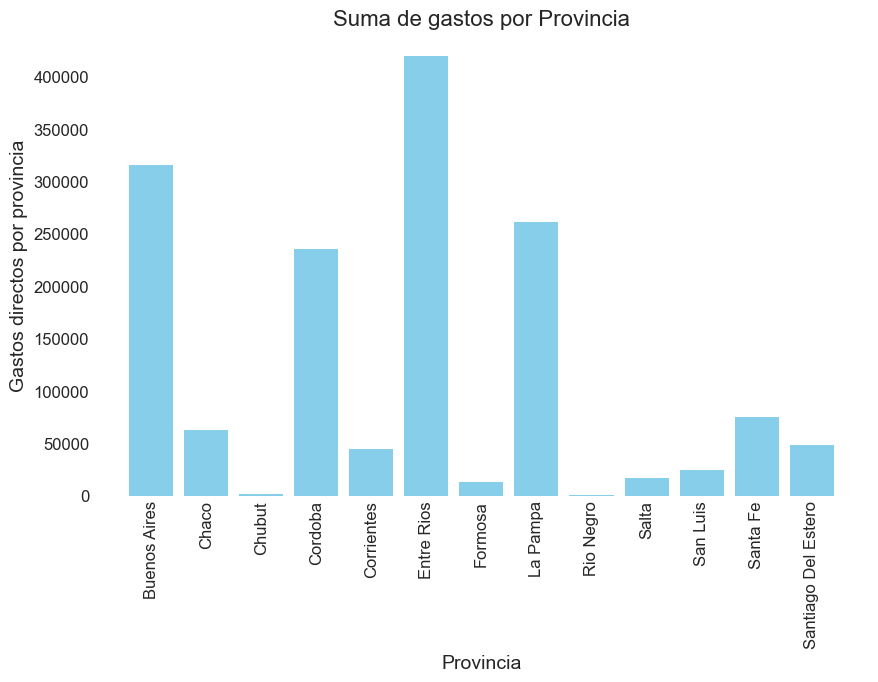

In [30]:
# Calcular los gastos directos por provincia
sum_gastos = df.groupby('provincia')['gastos_directos_($/ha)'].sum().reset_index()

# Crear un histograma de la suma de ganancias netas
plt.figure(figsize=(10, 6))
plt.bar(sum_gastos['provincia'], sum_gastos['gastos_directos_($/ha)'], color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Provincia')
plt.ylabel('Gastos directos por provincia')
plt.title('Suma de gastos por Provincia')
plt.xticks(rotation ='vertical')
# Mostrar el histograma
plt.show()

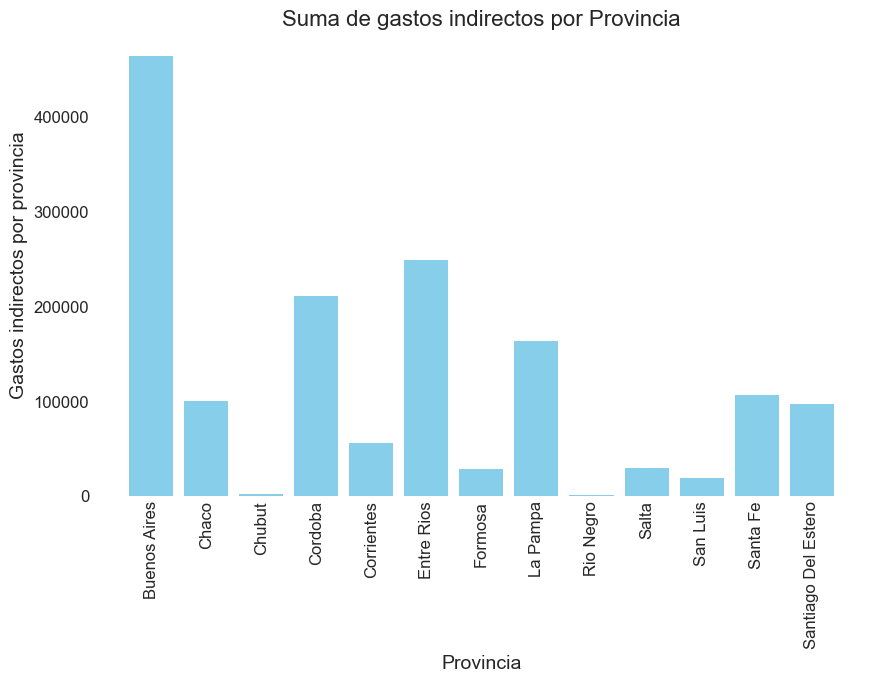

In [31]:
# Calcular los gastos indirectos por provincia
sum_gastos_indirectos = df.groupby('provincia')['costos_indirectos_($/ha)'].sum().reset_index()

# Crear un histograma de la suma de ganancias netas
plt.figure(figsize=(10, 6))
plt.bar(sum_gastos_indirectos['provincia'], sum_gastos_indirectos['costos_indirectos_($/ha)'], color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Provincia')
plt.ylabel('Gastos indirectos por provincia')
plt.title('Suma de gastos indirectos por Provincia')
plt.xticks(rotation ='vertical')
# Mostrar el histograma
plt.show()


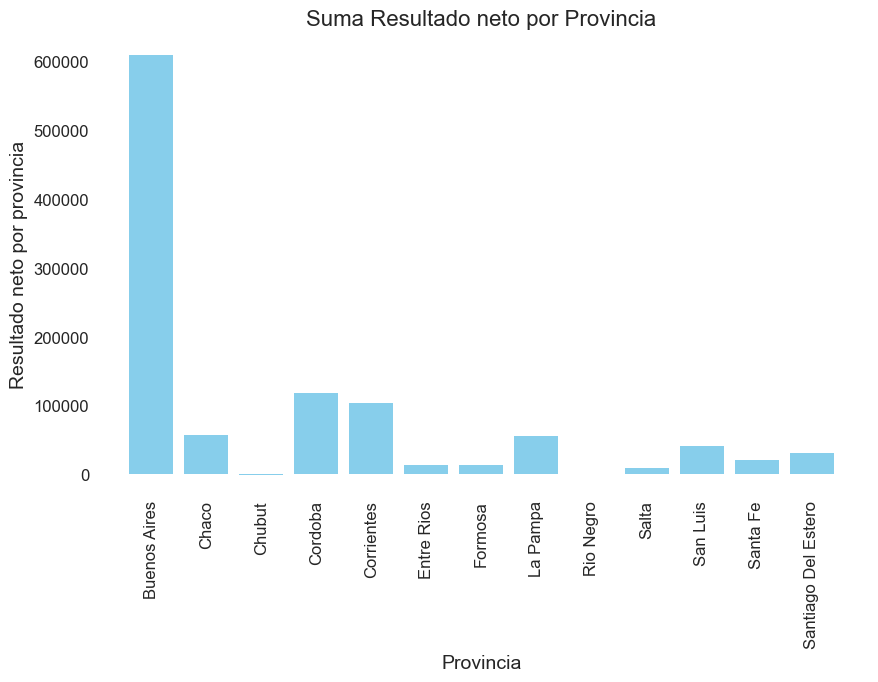

In [32]:
# Calcular resultado_neto por provincia
resultado_neto = df.groupby('provincia')['resultado_neto_($/ha)'].sum().reset_index()

# Crear un histograma de la suma de ganancias netas
plt.figure(figsize=(10, 6))
plt.bar(resultado_neto['provincia'], resultado_neto['resultado_neto_($/ha)'], color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Provincia')
plt.ylabel('Resultado neto por provincia')
plt.title('Suma Resultado neto por Provincia')
plt.xticks(rotation ='vertical')
# Mostrar el histograma
plt.show()

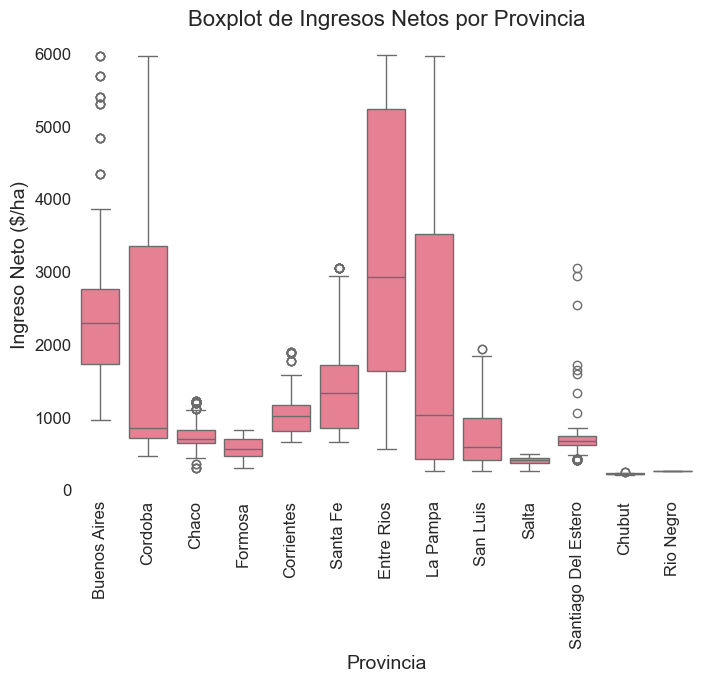

In [33]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='provincia', y='ingreso_neto_($/ha)', data=df)
plt.title('Boxplot de Ingresos Netos por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Ingreso Neto ($/ha)')
plt.xticks(rotation ='vertical')
plt.show()

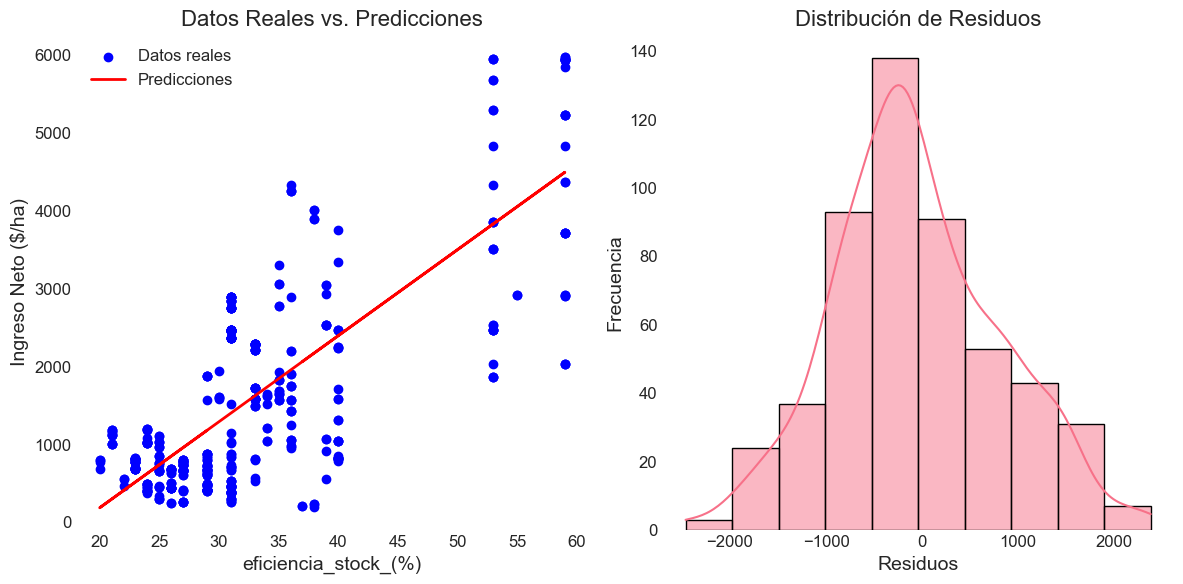


Métricas de rendimiento del modelo:
Mean Squared Error (MSE): 757538.29
R-squared (R2): 0.56


In [34]:
# Dividir los datos en conjunto de entrenamiento y prueba
X = df[['eficiencia_stock_(%)']]
y = df['ingreso_neto_($/ha)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualizar resultados
plt.figure(figsize=(12, 6))

# Gráfico de dispersión de los datos reales y predichos
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicciones')
plt.title('Datos Reales vs. Predicciones')
plt.xlabel('eficiencia_stock_(%)')
plt.ylabel('Ingreso Neto ($/ha)')
plt.legend()

# Gráfico de residuos
residuos = y_test - y_pred
plt.subplot(1, 2, 2)
sns.histplot(residuos, bins=10, kde=True)
plt.title('Distribución de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Imprimir métricas de rendimiento
print('\nMétricas de rendimiento del modelo:')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

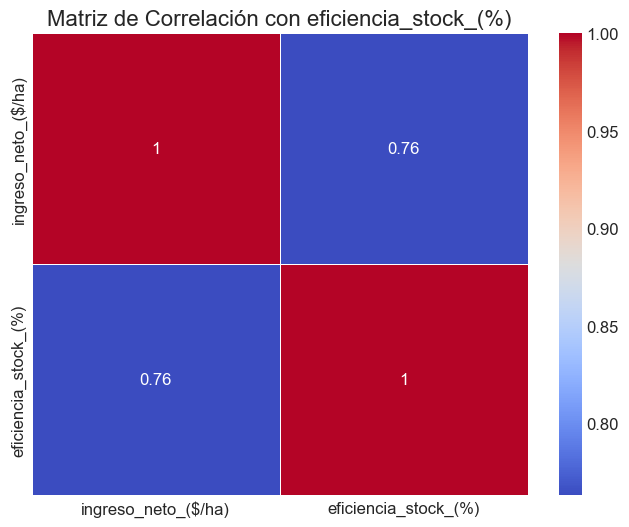

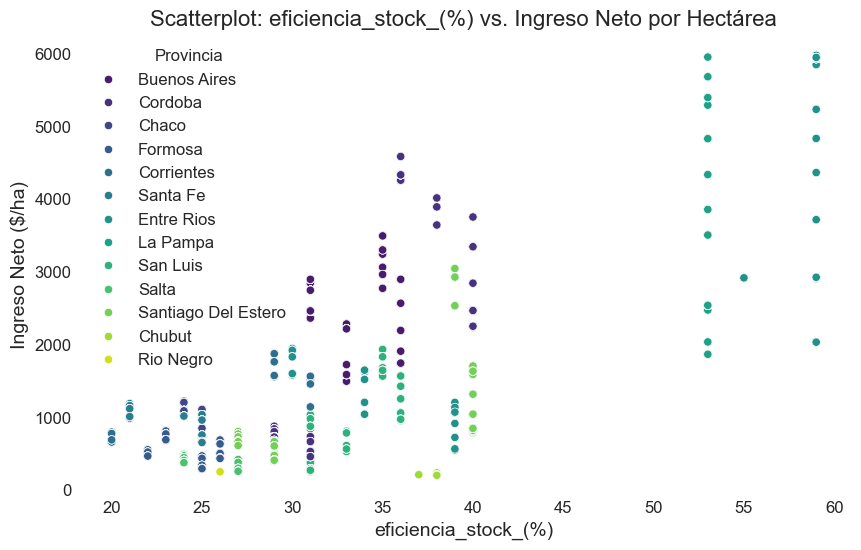

In [35]:
caracteristica_seleccionada = 'eficiencia_stock_(%)'

# Calcular la matriz de correlación solo con la característica seleccionada
correlation_matrix = df[['ingreso_neto_($/ha)', caracteristica_seleccionada]].corr()

# Visualizar la matriz de correlación usando un mapa de calor de Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(f'Matriz de Correlación con {caracteristica_seleccionada}')
plt.show()

# Scatterplot para visualizar la relación entre las variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x=caracteristica_seleccionada, y='ingreso_neto_($/ha)', data=df, hue='provincia', palette='viridis')
plt.title(f'Scatterplot: {caracteristica_seleccionada} vs. Ingreso Neto por Hectárea')
plt.xlabel(caracteristica_seleccionada)
plt.ylabel('Ingreso Neto ($/ha)')
plt.legend(title='Provincia')
plt.show()

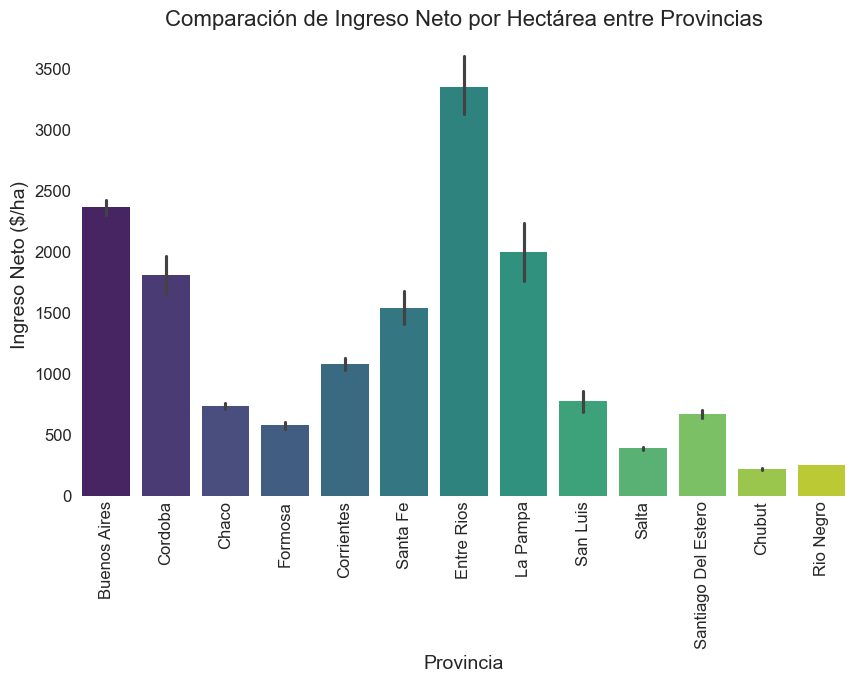

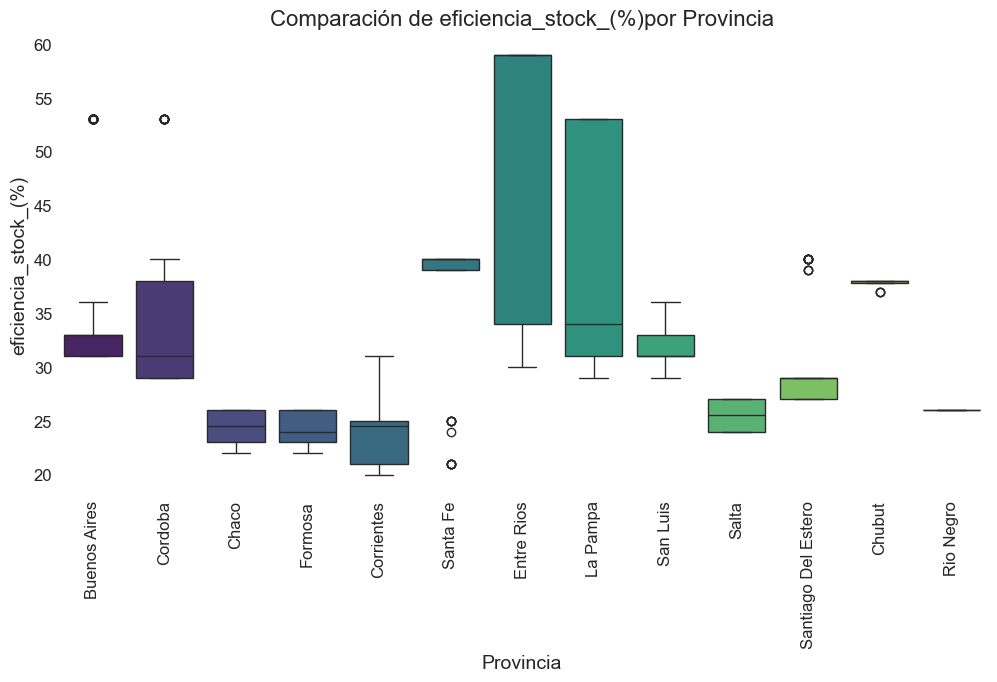

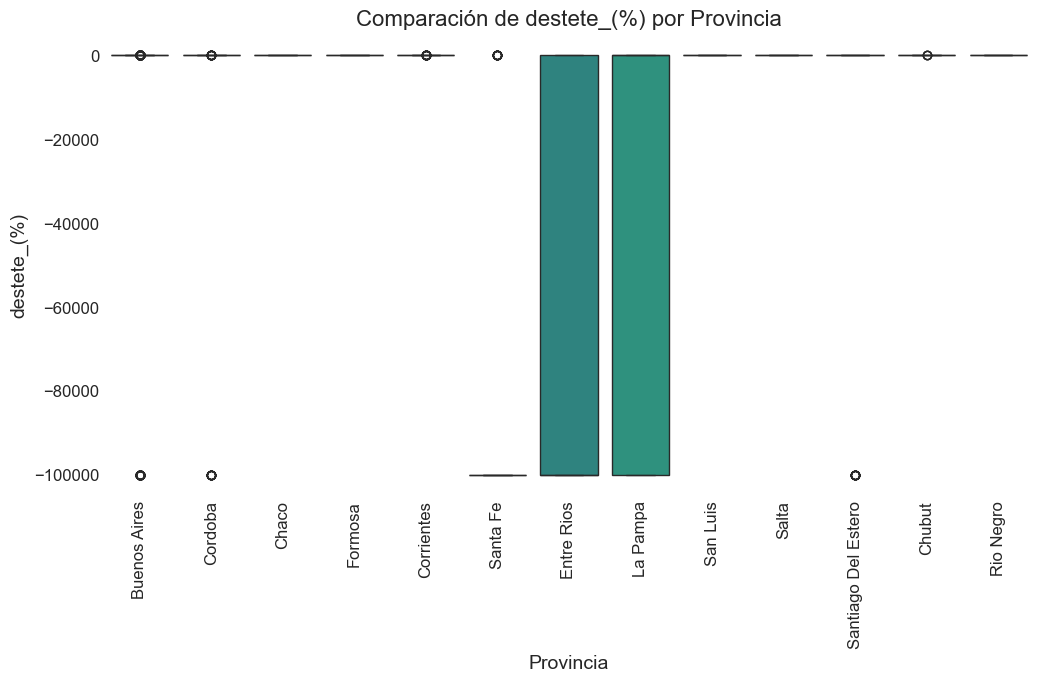

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x='provincia', y='ingreso_neto_($/ha)', data=df, hue='provincia', palette='viridis', dodge=False, legend=False)
plt.title('Comparación de Ingreso Neto por Hectárea entre Provincias')
plt.xlabel('Provincia')
plt.ylabel('Ingreso Neto ($/ha)')
plt.xticks(rotation ='vertical')
plt.show()

# Boxplot para comparar otras características por provincia
plt.figure(figsize=(12, 6))
sns.boxplot(x='provincia', y='eficiencia_stock_(%)', data=df, hue='provincia', palette='viridis', dodge=False, legend=False)
plt.title('Comparación de eficiencia_stock_(%)por Provincia')
plt.xlabel('Provincia')
plt.ylabel('eficiencia_stock_(%)')
plt.xticks(rotation ='vertical')
plt.show()

# Boxplot para otra característica (otra_caracteristica2)
plt.figure(figsize=(12, 6))
sns.boxplot(x='provincia', y='destete_(%)', data=df, hue='provincia', palette='viridis', dodge=False, legend=False)
plt.title('Comparación de destete_(%) por Provincia')
plt.xlabel('Provincia')
plt.ylabel('destete_(%)')
plt.xticks(rotation ='vertical')
plt.show()

In [37]:
# INVESTIGACIÓN DETALLADA DE LOS DATOS
# Vamos a revisar si los valores son realmente totales o por hectárea

print("🔍 INVESTIGACIÓN DETALLADA DE LOS DATOS")
print("="*60)

# Revisar una muestra de los datos originales
print("📊 MUESTRA DE DATOS ORIGINALES:")
print(df[['provincia', 'departamento', 'ingreso_neto_($/ha)']].head(10))

print(f"\n📈 ESTADÍSTICAS DE INGRESO_NETO_($/ha) EN EL DATASET:")
print(f"   • Valor mínimo: ${df['ingreso_neto_($/ha)'].min():,.2f}")
print(f"   • Valor máximo: ${df['ingreso_neto_($/ha)'].max():,.2f}")
print(f"   • Promedio: ${df['ingreso_neto_($/ha)'].mean():,.2f}")
print(f"   • Mediana: ${df['ingreso_neto_($/ha)'].median():,.2f}")

print(f"\n🌾 ANÁLISIS POR PROVINCIA:")
print(f"   • Total de registros en el dataset: {len(df):,}")
print(f"   • Número de provincias únicas: {df['provincia'].nunique()}")
print(f"   • Número de departamentos únicos: {df['departamento'].nunique()}")

# Contar registros por provincia
registros_por_provincia = df['provincia'].value_counts().sort_values(ascending=False)
print(f"\n📊 REGISTROS POR PROVINCIA (TOP 5):")
for i, (provincia, count) in enumerate(registros_por_provincia.head().items(), 1):
    print(f"   {i}. {provincia}: {count:,} registros")

print(f"\n🧮 VERIFICACIÓN DE CÁLCULOS:")
# Verificar manualmente Buenos Aires
ba_data = df[df['provincia'] == 'Buenos Aires']
ba_sum = ba_data['ingreso_neto_($/ha)'].sum()
ba_mean = ba_data['ingreso_neto_($/ha)'].mean()
ba_registros = len(ba_data)

print(f"   BUENOS AIRES (ejemplo):")
print(f"   • Registros: {ba_registros:,}")
print(f"   • Suma total: ${ba_sum:,.2f}")
print(f"   • Promedio: ${ba_mean:,.2f}")
print(f"   • Suma ÷ Registros = ${ba_sum/ba_registros:,.2f} (debe = promedio)")

print(f"\n💡 INTERPRETACIÓN:")
if ba_sum > 1_000_000:
    print(f"   ⚠️  La suma (${ba_sum:,.0f}) parece muy alta para ser $/ha")
    print(f"   📝 Es probable que sean TOTALES agregados, no por hectárea")
else:
    print(f"   ✅ Los valores parecen consistentes con $/ha")

print("="*60)

🔍 INVESTIGACIÓN DETALLADA DE LOS DATOS
📊 MUESTRA DE DATOS ORIGINALES:
      provincia         departamento  ingreso_neto_($/ha)
0  Buenos Aires              Bolivar                 3497
1  Buenos Aires             Daireaux                 3497
2  Buenos Aires       Coronel Suarez                 3497
3       Cordoba   General San Martin                 4589
4       Cordoba        Juarez Celman                 4589
5       Cordoba        Marcos Juarez                 4589
6       Cordoba  Presidente Roque...                 4589
7       Cordoba          Rio Primero                 4589
8       Cordoba          Rio Segundo                 4589
9       Cordoba            San Justo                 4589

📈 ESTADÍSTICAS DE INGRESO_NETO_($/ha) EN EL DATASET:
   • Valor mínimo: $205.00
   • Valor máximo: $5,980.00
   • Promedio: $1,585.56
   • Mediana: $1,013.00

🌾 ANÁLISIS POR PROVINCIA:
   • Total de registros en el dataset: 2,598
   • Número de provincias únicas: 13
   • Número de departame